#### Voting Classifier

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
import lightgbm as lgb

from src.paths import TRANSFORMED_DATA_DIR
from src.stemming_and_lemming import stem_reviews
from src.split_and_tfidf import split_and_vect

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [3]:
df = pd.read_parquet(TRANSFORMED_DATA_DIR / 'cleaned_sentiments.parquet')
df.head()

,recommended,cleaned
0,1,Very good flight following an equally good fli...
1,1,An hours delay due to late arrival of the inco...
2,0,I booked through BA because Loganair dont have...
3,0,British airways lost bags in LHR then found th...
4,0,The check in process and reward loyalty progra...


In [5]:
df_copy = df.copy()
from sklearn.linear_model import LogisticRegression, SGDClassifier
from lightgbm import LGBMClassifier

# split the data 
X_train, X_test, y_train, y_test, vectorizer = split_and_vect(df_copy, 'cleaned', 'recommended')

# train all 
log_reg = LogisticRegression()
sgd = SGDClassifier()
lgbm = LGBMClassifier()
rf = RandomForestClassifier()

# train the voting classifier
# majority vote ensemble
from sklearn.ensemble import VotingClassifier

# create a voting classifier
voting_classifier = VotingClassifier(
    estimators= [
        ('lr', log_reg),
        ('sgd', sgd),
        ('lightgbm', lgbm),
        ('rf', rf)
    ], voting='hard'
)

# fit
voting_classifier.fit(X_train, y_train)

# predict
y_pred = voting_classifier.predict(X_test)

c:\Users\ryans\Desktop\british_airways\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 1178, number of negative: 1937
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022597 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60118
[LightGBM] [Info] Number of data points in the train set: 3115, number of used features: 2113
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378170 -> initscore=-0.497322
[LightGBM] [Info] Start training from score -0.497322


c:\Users\ryans\Desktop\british_airways\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [6]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       503
           1       0.91      0.79      0.85       276

    accuracy                           0.90       779
   macro avg       0.90      0.87      0.89       779
weighted avg       0.90      0.90      0.90       779



c:\Users\ryans\Desktop\british_airways\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


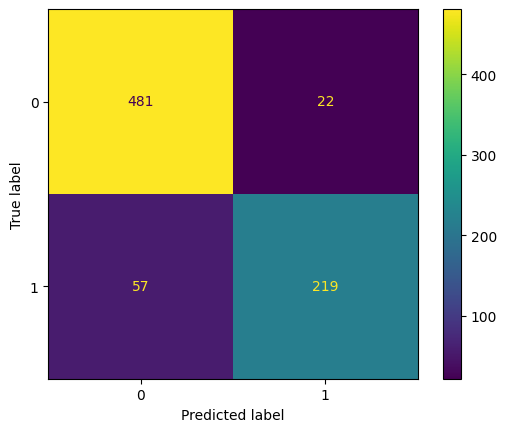

In [7]:
ConfusionMatrixDisplay.from_estimator(voting_classifier, X_test, y_test)